# Machine Learning & Deep Learning Foundations

In [10]:
#Libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## 1. Supervised Learning examples

### 1.1. Classification Decision Boundaries: From Linear to Complex
In these examples, we'll implement and visualize three classification models with increasing boundary complexity

#### Linear Boundary: Logistic Regression

**Linear Boundary**: Logistic regression creates a straight line (in 2D) or hyperplane (in **higher dimensions**) to separate classes.
**Decision Equation**: The boundary is defined by the equation: $w₁x₁ + w₂x₂ + b = 0$ where:

* $w₁$ and $w₂$ are the weights (coefficients)
* $b$ is the bias (intercept)
Points where this equation equals zero form the decision boundary

**Probability Interpretation**: Logistic regression outputs probabilities between 0 and 1 using the sigmoid function:

$P(y=1|x) = \frac{1}{1 + e^{-z}}$ where $z = w₁x₁ + w₂x₂ + b$

**Limitations:** Cannot capture non-linear patterns without feature engineering (adding polynomial terms, interactions, etc.)

In [11]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [12]:
# Print dataset information
print(f"Dataset: Breast Cancer Wisconsin")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"Classes: Malignant (0) and Benign (1)")
print(f"Class distribution: {np.bincount(y)}")

Dataset: Breast Cancer Wisconsin
Features: 30
Samples: 569
Classes: Malignant (0) and Benign (1)
Class distribution: [212 357]


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train logistic regression model
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Logistic Regression Performance:
Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [16]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
# Train logistic regression on PCA components
pca_model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, random_state=42)
pca_model.fit(X_train_pca, y_train)
pca_pred = pca_model.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, pca_pred)

In [24]:
# Create a meshgrid to visualize the decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Mesh step size
    
    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu_r)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, 
                         edgecolors='k', cmap=plt.cm.RdBu_r, alpha=0.8)
    
    plt.title(title, fontsize=15)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    
    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                         loc="upper right", title="Classes")
    plt.add_artist(legend1)
    
    # Plot the coefficients as a vector
    if hasattr(model, 'coef_'):
        coef = model.coef_[0]
        intercept = model.intercept_[0]
        
        # Calculate the slope of the decision boundary
        slope = -coef[0] / coef[1]
        
        # Create a line using the slope and intercept
        xx_line = np.linspace(x_min, x_max, 10)
        yy_line = slope * xx_line - intercept / coef[1]
        
        plt.plot(xx_line, yy_line, 'r-', linewidth=2, 
                label=f'Decision Line: {coef[0]:.2f}*PC1 + {coef[1]:.2f}*PC2 + {intercept:.2f} = 0')
        plt.legend()
    
    # Add PCA explained variance text
    explained_variance = pca.explained_variance_ratio_
    variance_text = f"PCA explained variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f}"
    plt.text(0.02, 0.02, variance_text, transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    # Add accuracy text
    acc_text = f"2D Model Accuracy: {pca_accuracy:.4f}"
    plt.text(0.02, 0.07, acc_text, transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_artist'

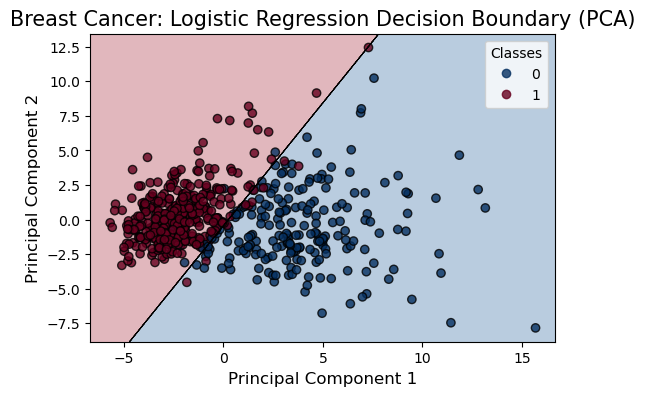

In [25]:
# Visualize the decision boundary in PCA space
plot_decision_boundary(pca_model, X_pca, y, 'Breast Cancer: Logistic Regression Decision Boundary (PCA)')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

# Show top features from logistic regression
coef_df = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Coefficient': model.coef_[0],
    'Absolute Value': np.abs(model.coef_[0])
}).sort_values('Absolute Value', ascending=False)

plt.figure(figsize=(12, 8))
top_features = coef_df.head(10)
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Top 10 Features for Predicting Breast Cancer (Logistic Regression)')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

# Clinical interpretation
print("\nClinical Interpretation of Top Features:")
for _, row in top_features.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = "increases" if coef > 0 else "decreases"
    print(f"- {feature}: Higher values {direction} likelihood of benign tumor")

## 2. Unsupervised Learning examples

## 3. Reinforcement Learning